In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.datasets import load_iris
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from LogisticRegression import LogisticRegression as LogisticRegression_
from utils import DataGenerator, draw_barplot

Реализация логистической регрессии

In [26]:
X, y = load_iris(return_X_y=True)
my_model = LogisticRegression_(n_iter=10000, weight_decay=0.1, reg_type="l1").fit(X, y)
print(f"Точность реализованной модели: {accuracy_score(my_model.predict(X), y)} ")

Точность реализованной модели: 0.96 


In [27]:
X, y = load_iris(return_X_y=True)
sk_model = LogisticRegression(max_iter=10000).fit(X, y)
print(f"Точность sklearn модели: {accuracy_score(sk_model.predict(X), y)} ")

Точность sklearn модели: 0.9733333333333334 


Исследование зависимости bias/variance от приложенной регуляризации

In [28]:
max_dim = 6
gen = DataGenerator(max_dim=max_dim)
X, y, _ = gen.generate_train_data((100, 100), 4, 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rv = loguniform(1e-4, 10)
nues = rv.rvs(random_state=42, size=25)
nues = np.sort(nues)

Для L1 регуляризации

In [29]:
biases = []
variances = []
metric = []
for nu in nues[::-1]:
    model = LogisticRegression(C=nu, penalty="l1", solver="saga")
    _, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss="mse")
    biases.append(bias)
    variances.append(variance)
    model.fit(X_train, y_train)
    metric.append(model.score(X_test, y_test))

Усиление регуляризации слева направо

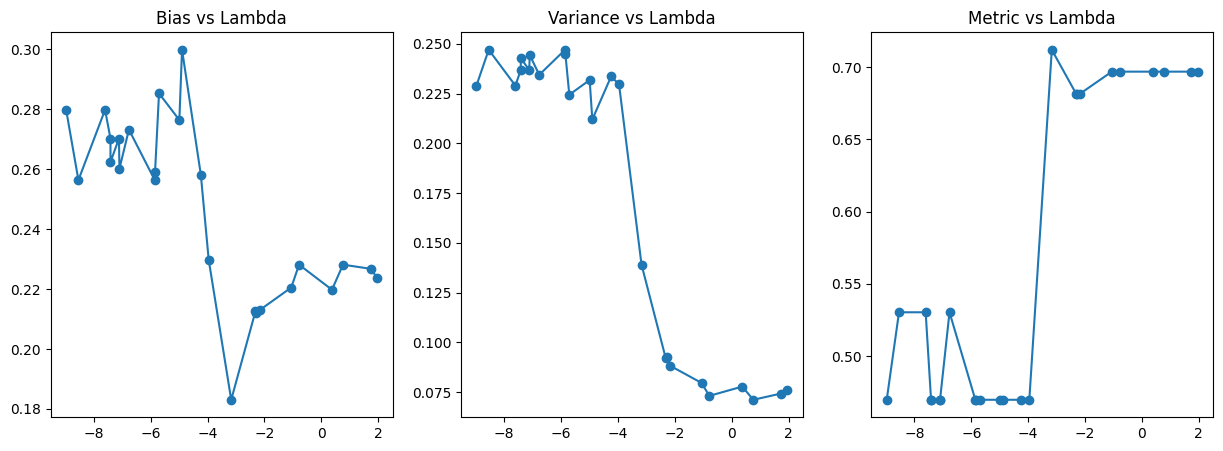

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Bias vs Lambda")
ax[0].plot(np.log(nues[::-1]), biases, "o-")
ax[1].set_title("Variance vs Lambda")
ax[1].plot(np.log(nues[::-1]), variances, "o-")
ax[2].set_title("Metric vs Lambda")
ax[2].plot(np.log(nues[::-1]), metric, "o-")

Для L2 регуляризации

In [33]:
biases = []
variances = []
metric = []
for nu in nues[::-1]:
    model = LogisticRegression(C=nu, max_iter=10000)
    _, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss="mse")
    biases.append(bias)
    variances.append(variance)
    model.fit(X_train, y_train)
    metric.append(model.score(X_test, y_test))

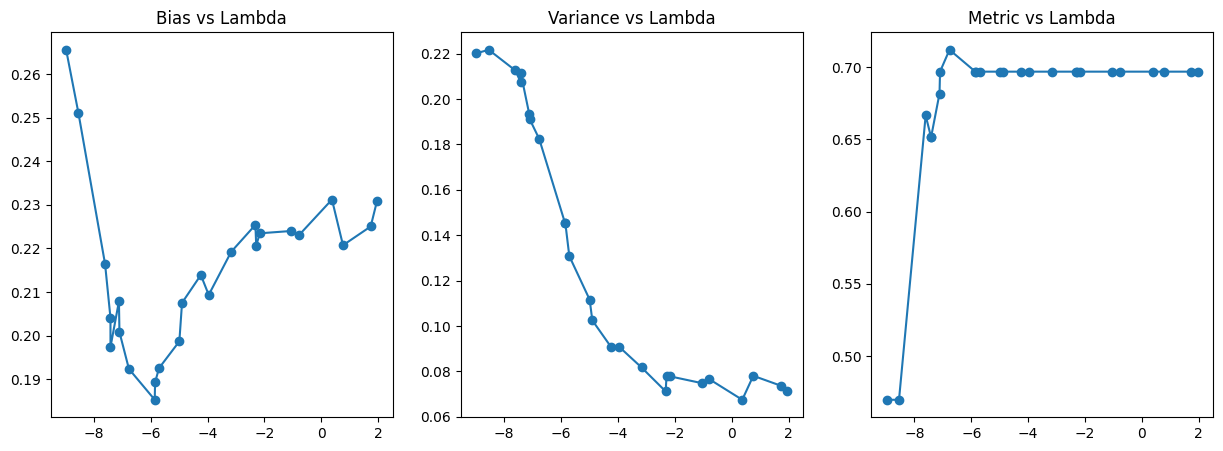

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Bias vs Lambda")
ax[0].plot(np.log(nues[::-1]), biases, "o-")
ax[1].set_title("Variance vs Lambda")
ax[1].plot(np.log(nues[::-1]), variances, "o-")
ax[2].set_title("Metric vs Lambda")
ax[2].plot(np.log(nues[::-1]), metric, "o-")